# <div align="center"> AIRLINE PASSENGER SATISFACTION </div>

## Import Library

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

pd.set_option('display.max_columns', 200)

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

## Read Dataset

In [13]:
#read dataset
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
#display details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Removing irrelevant columns

In [19]:
#drop 'Unnamed: 0' column because is not necesary
df.drop(['Unnamed: 0'],axis=1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [21]:
#display the shape of the data
df.shape

(103904, 25)

In [23]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [25]:
#check for any null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [27]:
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.29835232522328303

## Check missing values and filled with mean

In [30]:
#check missing values
def getmissing(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [32]:
values = getmissing(df)

In [34]:
values

{'Arrival Delay in Minutes': 15.18}

In [36]:
#fill missing value with median 
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [38]:
#checking duplicated data
df.duplicated().sum()

0

In [40]:
#drop 'Unnamed: 0' column and id colums because is not necesary
df1 = df.drop(columns = ['Unnamed: 0','id'])

In [42]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Understanding 

In [45]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
              'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
              'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
              'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [47]:
#show statistic of numerical column
df1[numerical].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [49]:
#show statistical summary for categorical column
df1[categorical].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [51]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [53]:
# Indicates the exact number of values
# this code is very useful because it has multiple categorical columns
for col in categorical:
    print (f'Value counts of {col} column')
    print(df[col].value_counts(), '\n')

Value counts of Gender column
Gender
Female    52727
Male      51177
Name: count, dtype: int64 

Value counts of Customer Type column
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64 

Value counts of Type of Travel column
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64 

Value counts of Class column
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64 

Value counts of satisfaction column
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64 



In [61]:
output_file_path = 'cleaned_train_data.csv'

# List of required columns
required_columns = [
    'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction','Age', 'Flight Distance', 'Inflight wifi service', 
    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 
    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
    'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]
# Check if the columns are present in the data, if not, add them with NaN values
for column in required_columns:
    if column not in df1.columns:
        df1[column] = np.nan

# Now, extract the DataFrame with all the required columns
cleaned_data = df1[required_columns]

cleaned_data.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to {output_file_path} with all specified columns.")

Cleaned dataset saved to cleaned_train_data.csv with all specified columns.


## Data Preprocessing and Feature Engineering:

### Handling Categorical Column (Encoding)

In [65]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [67]:
categoricals_unique(df1)

Gender : ['Male' 'Female']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco Plus' 'Business' 'Eco']
satisfaction : ['neutral or dissatisfied' 'satisfied']


In [69]:
for i in df1.columns:
    if df1[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df1[i]=label_encoder.fit_transform(df1[i])

In [71]:
df1['Class'].unique()

array([2, 0, 1])

In [73]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Split Data: Training-Testing

In [84]:
feature = df1.drop(columns = 'satisfaction')
target = df1[['satisfaction']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [86]:
feature_train.shape

(83123, 22)

# Models

## 1. LGBMClasifier

In [89]:
import lightgbm as lgb

In [90]:
classification = lgb.LGBMClassifier()
classification.fit(feature_train, target_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

### Model Prediction

In [94]:
# Predict the results
target_pred = classification.predict(feature_test)

### Show the accuracy model

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_pred, target_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred)))

LightGBM Model accuracy score: 0.9633


### Comparing Between Train dan Test set Accuracy:

In [100]:
target_pred_train = classification.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 0.9669


### Check Overfitting:

In [103]:
print('Training set score: {:.4f}'.format(classification.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(classification.score(feature_test, target_test)))

Training set score: 0.9669
Test set score: 0.9633


### Confusion Matrix

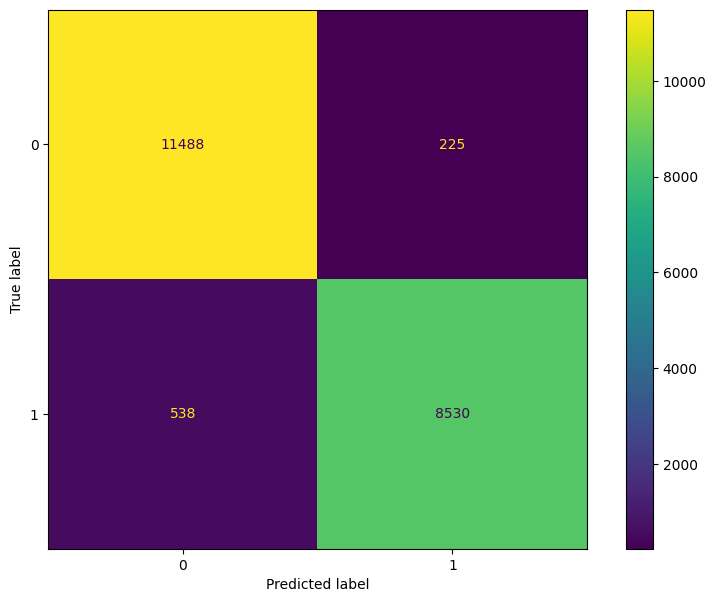

In [108]:
# Matrix confusion:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                             
disp.plot(ax=ax)
plt.show()

### Classification Metrics:

In [111]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [113]:
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(classification, file)

## 2. DecisionTreeClassifier

In [116]:
# Create the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(feature_train, target_train)

DecisionTreeClassifier()

### Model Prediction

In [119]:
target_pred = decision_tree.predict(feature_test)

### Accuracy of the Model:

In [122]:
accuracy = accuracy_score(target_pred, target_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy))

Decision Tree Model accuracy score: 0.9465


### Compare accuracy between training and test sets

In [125]:
target_pred_train = decision_tree.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 1.0000


### Check Overfitting

In [128]:
print('Training set score: {:.4f}'.format(decision_tree.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(decision_tree.score(feature_test, target_test)))

Training set score: 1.0000
Test set score: 0.9465


### Confusion Matrix:

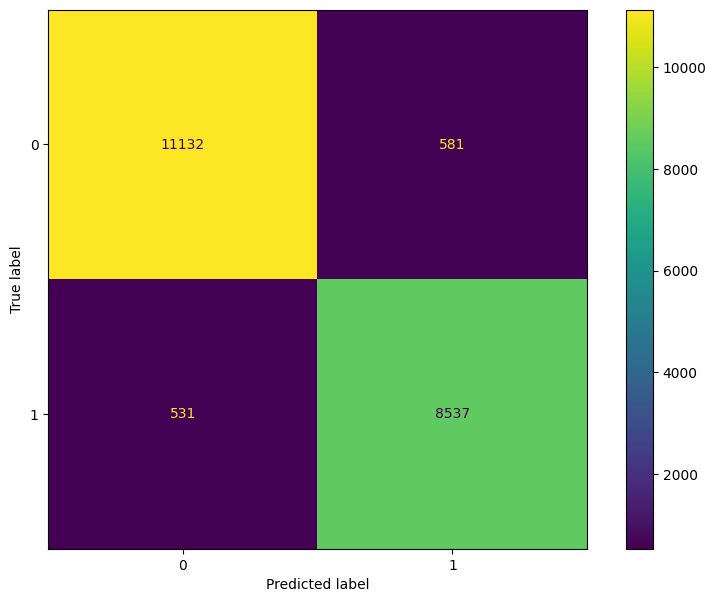

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(target_test))  # Include class labels for better interpretation
disp.plot(ax=ax)
plt.show()

### Classification Metrics:

In [148]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



## 3.XGB CClassifier

In [151]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [153]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(feature_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### MODEL PREDICTION

In [156]:
# predict the results
target_pred1 = xgb.predict(feature_test)

## Show The Accuracy of the model

In [159]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(target_pred1, target_test)
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred1)))

XGBClassifier Model accuracy score: 0.9630


## Coimpare Between Train dan Test set Accuracy:

In [162]:
target_pred_train1 = xgb.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train1)))

Training-set accuracy score: 0.9765


In [164]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb = XGBClassifier()
xgb.fit(feature_train, target_train)

# prediction
pred_train = xgb.predict(feature_train)

# model name
model_name = str(type(xgb)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(target_train, pred_train,
                                    target_names=['Neutral or Dissatisfied', 'Satisfied']))

print("Accuracy score for training dataset",accuracy_score(target_train, pred_train))

		XGBCLASSIFIER MODEL

Training part:
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.97      0.99      0.98     47166
              Satisfied       0.98      0.96      0.97     35957

               accuracy                           0.98     83123
              macro avg       0.98      0.97      0.98     83123
           weighted avg       0.98      0.98      0.98     83123

Accuracy score for training dataset 0.9764565763988307


## Check Overfitting

In [167]:
print('Training set score: {:.4f}'.format(xgb.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(xgb.score(feature_test, target_test)))

Training set score: 0.9765
Test set score: 0.9630
